In [1]:
import requests
import inspect
import pytz
import pandas as pd
from pprint import pprint

from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

debug = False

In [2]:
def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S') 

In [3]:
def name_of_global_obj(xx):
    for objname, oid in globals().items():
        if oid is xx:
            return objname

In [4]:
class Dict2Class(object):
    '''
    Turns a dictionary into a class - Do not convert embedded dictionaries
    '''
    def __init__(self, my_dict):  
        print('\nName of dictionary object:',object.__name__)
        try:
            print('\nName in dictionary : ',my_dict['__name__']) 
        except:
            print('\nGlobal name : ',name_of_global_obj(my_dict))  
            setattr(self,'__name__', name_of_global_obj(my_dict)) 
        
            
        for key in my_dict:
            #current dict
            if key == 'dt':
                setattr(self,'human_dt',human_date(my_dict[key]))
            if key == 'sys':
                    setattr(self,'human_sr',human_date(my_dict[key]['sunrise']))
                    setattr(self,'human_ss',human_date(my_dict[key]['sunset']))
            print('Key ',key,my_dict[key])
            try:
                setattr(self, key, my_dict[key])
                # onecall dict
                if key == 'current':
                    setattr(self,'human_dt',human_date(my_dict[key]['dt']))
                    setattr(self,'human_sr',human_date(my_dict[key]['sunrise']))
                    setattr(self,'human_ss',human_date(my_dict[key]['sunset']))
            except:
                pass
    
    def get_alerts(self):
        for alert in self.alerts:
            try:
                #pprint(self.alerts)
                desc = alert['description']
                # https://www.epochconverter.com/
                start = ctime(self.alerts[0]['start'])        
                end = ctime(self.alerts[0]['end'])
                # event, tags, description, source
                event = alert['event']
                tags = alert['tags']
                source = alert['sender_name']
                print('Start:',start, '\nEnd:',end)        
                print(desc)
                
                print(event,tags)        
                print('Source:',source)
                print()
            except:
                print('No alerts')
            
    def show_attributes(self, debug = False):
        print('\nAttributes :\n')
        for i in inspect.getmembers(self):
            if debug: print(i)
            # to remove private and protected
            # functions
            if not i[0].startswith('_'):
                
                # To remove other methods that
                # do not start with a underscore
                if not inspect.ismethod(i[1]): 
                    print(i[0],':',i[1])

In [5]:
class onecallclass(object):
    
    '''convert all embedded dictionary to class attributes'''
    def __init__(self, my_dict):
        onecall_class =  Dict2Class(my_dict)
        print('\nName of Onecall object :',onecall_class.__name__)  
        setattr(self,'__name__', name_of_global_obj(my_dict))  
#         self.t_day = []
#         self.t_eve = []
#         self.t_morning = []
#         t_day = []
#         t_eve = []
#         t_morning = []
        for k in onecall_class.__dict__.keys():
            value = onecall_class.__getattribute__(k)
            #print('*********************Key :', k, value)
            if k=='alerts':
                self.alerts = value
                break
            if isinstance(value, dict):
                #if debug: print('--------------------------------------------------')
                print('Instancing with', k, value)
                value['__name__'] = k
                print('Value',value)
                setattr(self, k, Dict2Class(value))
            elif isinstance(value, list):
                
                print(value,'>>>>>',len(value))
                if debug: print('++++++++++++++++++++++++++++++++++++++++++++++++++')
                print('List of',len(value),'dictionaries computing', value)
                if len(value)==1:
                    v = value[0]
                    print('line138',value,'\n***',value[0])
                    #if isinstance(value[0], list):
                    #setattr(self, k, value[0])
                    if isinstance(v, dict):
                        v['__name__'] = k
                        setattr(self, k, onecallclass(v))
                    else:
                        setattr(self, k, value[0])
                else:
                    #t_day = []
                    for i,d in enumerate(value):
                        
                        #if debug: print('***** day',i)
                        #print('gggggggggg',k+str(i),d)
                        d['__name__'] = k+str(i)
                        setattr(self, k+str(i), onecallclass(d))
                        #try:
                        #c = self.__getattribute__(k+str(i))
                        #if debug: print('***************')
                        #if debug: print(d['dt'],dir(c),c.dt)
                        #if debug: print(c.temp.day)
#                         t_eve.append(c.temp.eve)
#                         t_morning.append(c.temp.morn)
#                         t_day.append(c.temp.day)
                        #t_day.append(c.temp.day)
                        #except:
                        #    pass
                    
                #if debug: print('++++++++++++++++++++++++++++++++++++++++++++++++++')
            else:
                setattr(self, k, value)
        
#         self.t_day = t_day
#         self.t_eve = t_eve
#         self.t_morning = t_morning
    
    def get_alerts(self):
        try:
            for alert in self.alerts:
            
                #pprint(self.alerts)
                desc = alert['description']
                # https://www.epochconverter.com/
                start = ctime(self.alerts[0]['start'])        
                end = ctime(self.alerts[0]['end'])
                # event, tags, description, source
                event = alert['event']
                tags = alert['tags']
                source = alert['sender_name']
                print('Start:',start, '\nEnd:',end)        
                print(desc)
                
                print(event,tags)        
                print('Source:',source)
                print()
        except:
                print('No alerts')
            
                
    def get_temperature(self):
        t_day = []
        t_min = []
        t_max =[]
        t_night = []
        t_eve = []
        t_morn = []
        for k in range(8):
            t_day.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['day'])
            t_min.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['min'])
            t_max.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['max'])
            t_night.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['night'])
            t_eve.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['eve'])
            t_morn.append(self.__dict__['daily'+str(k)].__dict__['temp'].__dict__['morn'])
        return t_day, t_min, t_max, t_night, t_eve, t_morn


# if debug: print('Keys :',onecall_data.keys())
# if debug: print('Current dictionary ;',onecall_data['current'])
# if debug: print('daily key contents :',onecall_data['daily'])

In [6]:
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = 48.8833, 2.5333
# onecall : https://openweathermap.org/api/one-call-api
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
try:
    onecall_data = requests.get(base_url).json()
    # pprint(onecall_data)  # keys : current, lat, lon,minutely,timezone, timezone_offset
    if debug:pprint(onecall_data['current'])
except:
    exit()

In [7]:
onecall_data

{'lat': 48.8833,
 'lon': 2.5333,
 'timezone': 'Europe/Paris',
 'timezone_offset': 3600,
 'current': {'dt': 1707246821,
  'sunrise': 1707203640,
  'sunset': 1707238429,
  'temp': 10.7,
  'feels_like': 10.1,
  'pressure': 1016,
  'humidity': 87,
  'dew_point': 8.63,
  'uvi': 0,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 7.72,
  'wind_deg': 210,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 'daily': [{'dt': 1707220800,
   'sunrise': 1707203640,
   'sunset': 1707238429,
   'moonrise': 1707195600,
   'moonset': 1707221520,
   'moon_phase': 0.87,
   'temp': {'day': 11.1,
    'min': 8.38,
    'max': 11.46,
    'night': 10.72,
    'eve': 10.7,
    'morn': 9.14},
   'feels_like': {'day': 10.02, 'night': 10.07, 'eve': 10.05, 'morn': 6.54},
   'pressure': 1020,
   'humidity': 67,
   'dew_point': 5.11,
   'wind_speed': 6.85,
   'wind_deg': 231,
   'wind_gust': 14.13,
   'weather': [{'id': 804,
     'main': 'Clouds',
     'des

In [8]:
# convert dictionary to class but embedded dictionaries are not converted
onecall_class = Dict2Class(onecall_data)
onecall_class



Name of dictionary object: object

Global name :  _
Key  lat 48.8833
Key  lon 2.5333
Key  timezone Europe/Paris
Key  timezone_offset 3600
Key  current {'dt': 1707246821, 'sunrise': 1707203640, 'sunset': 1707238429, 'temp': 10.7, 'feels_like': 10.1, 'pressure': 1016, 'humidity': 87, 'dew_point': 8.63, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 7.72, 'wind_deg': 210, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}
Key  daily [{'dt': 1707220800, 'sunrise': 1707203640, 'sunset': 1707238429, 'moonrise': 1707195600, 'moonset': 1707221520, 'moon_phase': 0.87, 'temp': {'day': 11.1, 'min': 8.38, 'max': 11.46, 'night': 10.72, 'eve': 10.7, 'morn': 9.14}, 'feels_like': {'day': 10.02, 'night': 10.07, 'eve': 10.05, 'morn': 6.54}, 'pressure': 1020, 'humidity': 67, 'dew_point': 5.11, 'wind_speed': 6.85, 'wind_deg': 231, 'wind_gust': 14.13, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': 1

In [9]:
onecall_class.show_attributes(True)


Attributes :

('__class__', <class '__main__.Dict2Class'>)
('__delattr__', <method-wrapper '__delattr__' of Dict2Class object at 0x0000013613F26390>)
('__dict__', {'__name__': '_', 'lat': 48.8833, 'lon': 2.5333, 'timezone': 'Europe/Paris', 'timezone_offset': 3600, 'current': {'dt': 1707246821, 'sunrise': 1707203640, 'sunset': 1707238429, 'temp': 10.7, 'feels_like': 10.1, 'pressure': 1016, 'humidity': 87, 'dew_point': 8.63, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 7.72, 'wind_deg': 210, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}, 'human_dt': '06/02/2024 20:13:41', 'human_sr': '06/02/2024 08:14:00', 'human_ss': '06/02/2024 17:53:49', 'daily': [{'dt': 1707220800, 'sunrise': 1707203640, 'sunset': 1707238429, 'moonrise': 1707195600, 'moonset': 1707221520, 'moon_phase': 0.87, 'temp': {'day': 11.1, 'min': 8.38, 'max': 11.46, 'night': 10.72, 'eve': 10.7, 'morn': 9.14}, 'feels_like': {'day': 10.02, 'night': 10.07, 'eve': 10.05, 

In [10]:
# class Dict2Class
onecall_class =  Dict2Class(onecall_data)
print('\nName of Onecall object :',onecall_class.__name__)  



Name of dictionary object: object

Global name :  __
Key  lat 48.8833
Key  lon 2.5333
Key  timezone Europe/Paris
Key  timezone_offset 3600
Key  current {'dt': 1707246821, 'sunrise': 1707203640, 'sunset': 1707238429, 'temp': 10.7, 'feels_like': 10.1, 'pressure': 1016, 'humidity': 87, 'dew_point': 8.63, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 7.72, 'wind_deg': 210, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}
Key  daily [{'dt': 1707220800, 'sunrise': 1707203640, 'sunset': 1707238429, 'moonrise': 1707195600, 'moonset': 1707221520, 'moon_phase': 0.87, 'temp': {'day': 11.1, 'min': 8.38, 'max': 11.46, 'night': 10.72, 'eve': 10.7, 'morn': 9.14}, 'feels_like': {'day': 10.02, 'night': 10.07, 'eve': 10.05, 'morn': 6.54}, 'pressure': 1020, 'humidity': 67, 'dew_point': 5.11, 'wind_speed': 6.85, 'wind_deg': 231, 'wind_gust': 14.13, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'clouds': 

In [11]:
daily =[{'dt': 1690887600, 'sunrise': 1690863747, 'sunset': 1690918191, 'moonrise': 1690919940, 'moonset': 1690859520, 'moon_phase': 0.5,
         'temp': {'day': 21.03, 'min': 15.2, 'max': 21.8, 'night': 19.3, 'eve': 21.8, 'morn': 15.2}, 
         'feels_like': {'day': 20.7, 'night': 19.06, 'eve': 21.52, 'morn': 15.18}, 'pressure': 1007, 'humidity': 58, 'dew_point': 12.46, 'wind_speed': 7.7, 'wind_deg': 230, 'wind_gust': 15.53, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': 96, 'pop': 1, 'rain': 7.45, 'uvi': 4.1}, {'dt': 1690974000, 'sunrise': 1690950228, 'sunset': 1691004504, 'moonrise': 1691008020, 'moonset': 1690951380, 'moon_phase': 0.53, 'temp': {'day': 23.32, 'min': 16.34, 'max': 25.27, 'night': 18, 'eve': 21.66, 'morn': 18.07}, 'feels_like': {'day': 23.25, 'night': 17.81, 'eve': 21.24, 'morn': 18.39}, 'pressure': 997, 'humidity': 59, 'dew_point': 14.71, 'wind_speed': 9.35, 'wind_deg': 230, 'wind_gust': 18.02, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'clouds': 67, 'pop': 1, 'rain': 14.86, 'uvi': 7.04}, {'dt': 1691060400, 'sunrise': 1691036710, 'sunset': 1691090815, 'moonrise': 1691095680, 'moonset': 1691043240, 'moon_phase': 0.57, 'temp': {'day': 16.38, 'min': 15.23, 'max': 18.6, 'night': 15.34, 'eve': 15.95, 'morn': 15.63}, 'feels_like': {'day': 16.4, 'night': 15.33, 'eve': 16, 'morn': 15.52}, 'pressure': 1006, 'humidity': 89, 'dew_point': 14.44, 'wind_speed': 8.44, 'wind_deg': 238, 'wind_gust': 15.43, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': 100, 'pop': 1, 'rain': 15.13, 'uvi': 1.74}, {'dt': 1691146800, 'sunrise': 1691123192, 'sunset': 1691177125, 'moonrise': 1691183160, 'moonset': 1691134980, 'moon_phase': 0.6, 'temp': {'day': 19.85, 'min': 13.3, 'max': 19.85, 'night': 13.93, 'eve': 16.48, 'morn': 13.62}, 'feels_like': {'day': 19.48, 'night': 13.57, 'eve': 16.4, 'morn': 13.44}, 'pressure': 1016, 'humidity': 61, 'dew_point': 11.91, 'wind_speed': 5.14, 'wind_deg': 315, 'wind_gust': 8.81, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': 97, 'pop': 1, 'rain': 4.72, 'uvi': 5.46}, {'dt': 1691233200, 'sunrise': 1691209674, 'sunset': 1691263433, 'moonrise': 1691270580, 'moonset': 1691226480, 'moon_phase': 0.64, 'temp': {'day': 18.36, 'min': 13.87, 'max': 18.36, 'night': 16.3, 'eve': 16.9, 'morn': 14.7}, 'feels_like': {'day': 17.58, 'night': 15.89, 'eve': 16.08, 'morn': 14.37}, 'pressure': 1017, 'humidity': 51, 'dew_point': 8.03, 'wind_speed': 6.9, 'wind_deg': 230, 'wind_gust': 13.61, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': 100, 'pop': 0.28, 'rain': 0.36, 'uvi': 1.89}, {'dt': 1691319600, 'sunrise': 1691296157, 'sunset': 1691349739, 'moonrise': 1691357940, 'moonset': 1691317800, 'moon_phase': 0.68, 'temp': {'day': 19.64, 'min': 13.5, 'max': 19.95, 'night': 15.3, 'eve': 18.07, 'morn': 13.5}, 'feels_like': {'day': 18.89, 'night': 14.84, 'eve': 17.58, 'morn': 12.89}, 'pressure': 1018, 'humidity': 47, 'dew_point': 7.94, 'wind_speed': 6.02, 'wind_deg': 257, 'wind_gust': 12.28, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': 53, 'pop': 0.3, 'rain': 0.4, 'uvi': 2}, {'dt': 1691406000, 'sunrise': 1691382641, 'sunset': 1691436044, 'moonrise': 1691445420, 'moonset': 1691409000, 'moon_phase': 0.71, 'temp': {'day': 18.7, 'min': 12.98, 'max': 21.03, 'night': 14.96, 'eve': 19.12, 'morn': 13.41}, 'feels_like': {'day': 17.93, 'night': 14.16, 'eve': 18.31, 'morn': 12.87}, 'pressure': 1019, 'humidity': 50, 'dew_point': 8.03, 'wind_speed': 4.92, 'wind_deg': 279, 'wind_gust': 9.86, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': 75, 'pop': 0.21, 'rain': 0.17, 'uvi': 2}, {'dt': 1691492400, 'sunrise': 1691469124, 'sunset': 1691522347, 'moonrise': 0, 'moonset': 1691500140, 'moon_phase': 0.75, 'temp': {'day': 21.76, 'min': 12.42, 'max': 22.42, 'night': 17.52, 'eve': 19.8, 'morn': 13.39}, 'feels_like': {'day': 20.93, 'night': 16.89, 'eve': 19.14, 'morn': 12.8}, 'pressure': 1018, 'humidity': 36, 'dew_point': 6.07, 'wind_speed': 3.48, 'wind_deg': 347, 'wind_gust': 4.49, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': 12, 'pop': 0, 'uvi': 2}]
len(daily)

8

In [12]:
daily[0]

{'dt': 1690887600,
 'sunrise': 1690863747,
 'sunset': 1690918191,
 'moonrise': 1690919940,
 'moonset': 1690859520,
 'moon_phase': 0.5,
 'temp': {'day': 21.03,
  'min': 15.2,
  'max': 21.8,
  'night': 19.3,
  'eve': 21.8,
  'morn': 15.2},
 'feels_like': {'day': 20.7, 'night': 19.06, 'eve': 21.52, 'morn': 15.18},
 'pressure': 1007,
 'humidity': 58,
 'dew_point': 12.46,
 'wind_speed': 7.7,
 'wind_deg': 230,
 'wind_gust': 15.53,
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'clouds': 96,
 'pop': 1,
 'rain': 7.45,
 'uvi': 4.1}

In [13]:
# class onecallclass
one = onecallclass(onecall_data)
one


Name of dictionary object: object

Global name :  onecall_data
Key  lat 48.8833
Key  lon 2.5333
Key  timezone Europe/Paris
Key  timezone_offset 3600
Key  current {'dt': 1707246821, 'sunrise': 1707203640, 'sunset': 1707238429, 'temp': 10.7, 'feels_like': 10.1, 'pressure': 1016, 'humidity': 87, 'dew_point': 8.63, 'uvi': 0, 'clouds': 75, 'visibility': 10000, 'wind_speed': 7.72, 'wind_deg': 210, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]}
Key  daily [{'dt': 1707220800, 'sunrise': 1707203640, 'sunset': 1707238429, 'moonrise': 1707195600, 'moonset': 1707221520, 'moon_phase': 0.87, 'temp': {'day': 11.1, 'min': 8.38, 'max': 11.46, 'night': 10.72, 'eve': 10.7, 'morn': 9.14}, 'feels_like': {'day': 10.02, 'night': 10.07, 'eve': 10.05, 'morn': 6.54}, 'pressure': 1020, 'humidity': 67, 'dew_point': 5.11, 'wind_speed': 6.85, 'wind_deg': 231, 'wind_gust': 14.13, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 

In [14]:
one.current.temp

10.7

In [15]:
# get alerts
one.get_alerts()

No alerts


In [16]:
one.get_temperature()

([11.1, 10.98, 12.03, 13.21, 11.38, 8.99, 9.68, 10.11],
 [8.38, 10.38, 10.55, 9.88, 8.32, 7.96, 5.05, 4.54],
 [11.46, 11.19, 12.57, 13.21, 11.38, 9.76, 10.79, 11.25],
 [10.72, 11.18, 10.55, 9.88, 9.45, 8.36, 7.16, 8.46],
 [10.7, 10.45, 11.4, 10.89, 10.03, 9.64, 8.33, 8.97],
 [9.14, 10.75, 12.56, 11, 8.32, 7.96, 5.05, 4.54])

In [17]:
for k in range(8):
    if debug: print(one.__dict__['daily'+str(k)].__dict__['temp'].__dict__['day'])
    
t_day,t_min, t_max, t_night, t_eve, t_morn = one.get_temperature()
t_day,t_min, t_max, t_night, t_eve, t_morn

([11.1, 10.98, 12.03, 13.21, 11.38, 8.99, 9.68, 10.11],
 [8.38, 10.38, 10.55, 9.88, 8.32, 7.96, 5.05, 4.54],
 [11.46, 11.19, 12.57, 13.21, 11.38, 9.76, 10.79, 11.25],
 [10.72, 11.18, 10.55, 9.88, 9.45, 8.36, 7.16, 8.46],
 [10.7, 10.45, 11.4, 10.89, 10.03, 9.64, 8.33, 8.97],
 [9.14, 10.75, 12.56, 11, 8.32, 7.96, 5.05, 4.54])

In [18]:
amplitude = [d-n for d,n in zip(t_max,t_min)]
day_night_diff = [d-n for d,n in zip(t_morn,t_night)]


In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

now = dt.datetime.now()
then = now + dt.timedelta(days=8)
days = mdates.drange(now,then,dt.timedelta(days=1))
days

array([19759.84315838, 19760.84315838, 19761.84315838, 19762.84315838,
       19763.84315838, 19764.84315838, 19765.84315838, 19766.84315838])

In [20]:
one.current.temp

10.7

Text(0.5, 1.0, 'Current temp : 10.7 °C / hum: 87% (06/02/24 20:14:09)')

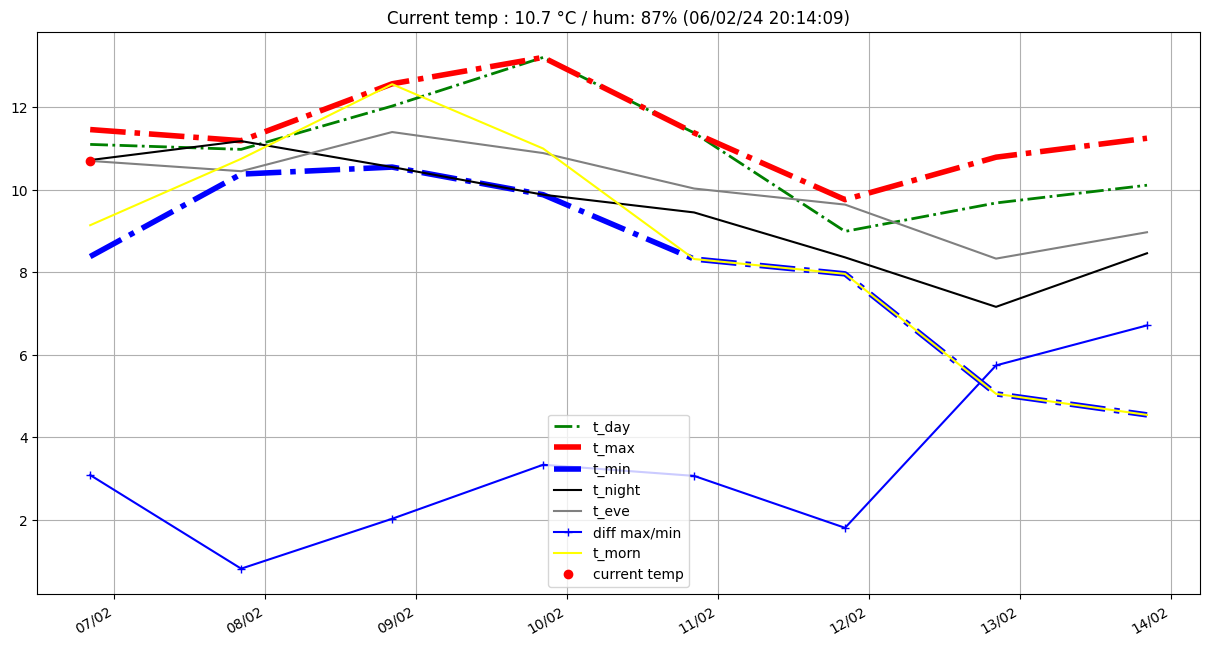

In [21]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8.27)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.plot(days,t_day,'g-.',label='t_day',linewidth=2)

plt.plot(days,t_max,'r-.',label='t_max',linewidth=4)

plt.plot(days,t_min,'b-.',label='t_min',linewidth=4)

plt.plot(days,t_night,'black',label='t_night')

plt.plot(days,t_eve,'gray',label='t_eve')
plt.plot(days,amplitude,'b+-',label='diff max/min')
#plt.plot(days,day_night_diff,'b+-',label='diff matin/nuit')

plt.plot(days,t_morn,'yellow',label='t_morn')
plt.plot(days[0],one.current.temp,'ro',label='current temp')
plt.grid()
plt.legend()
plt.title('Current temp : '+str(one.current.temp)+' °C / hum: '+ str(one.current.humidity)+'% ('+datetime.now().strftime('%d/%m/%y %H:%M:%S'+')'))
#plt.show()